# Predicting Podcast Time
**Author: Benson Wainaina**

In this notebook, I aim to predict the amount of time someone listens to a podcast. I'll be exploring various techniques such as linear regression, knearest neighbors, support vector machine, decision trees, random rainforest, neural networks, and ensemble methods. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data_path = "../../../Data/playground-series-s5e4/"
train = pd.read_csv(data_path+"train.csv", index_col=["id"])
test = pd.read_csv(data_path+"test.csv", index_col=["id"])
sample_submission = pd.read_csv(data_path+"sample_submission.csv")

Now that I have the **data** I want to quickly explore it to understand what I'm working with.

In [20]:
train.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
id,,,,,,,,,,,
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [22]:
test.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
id,,,,,,,,,,
750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [24]:
sample_submission.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 68.7+ MB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 250000 non-null  object 
 1   Episode_Title                250000 non-null  object 
 2   Episode_Length_minutes       221264 non-null  float64
 3   Genre                        250000 non-null  object 
 4   Host_Popularity_percentage   250000 non-null  float64
 5   Publication_Day              250000 non-null  object 
 6   Publication_Time             250000 non-null  object 
 7   Guest_Popularity_percentage  201168 non-null  float64
 8   Number_of_Ads                250000 non-null  float64
 9   Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 21.0+ MB


In [32]:
train.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [34]:
train.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


In [36]:
test.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,2.212640e+05,250000.000000,201168.000000,250000.000000
mean,4.192987e+02,59.716491,52.192796,1.355852
std,1.668545e+05,22.880028,28.445034,4.274399
min,2.470000e+00,2.490000,0.000000,0.000000
25%,3.578000e+01,39.250000,28.320000,0.000000
50%,6.397000e+01,59.900000,53.360000,1.000000
75%,9.415000e+01,79.390000,76.560000,2.000000
max,7.848626e+07,117.760000,116.820000,2063.000000


In [38]:
test.describe(include="O")

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,250000,250000,250000,250000,250000,250000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,7553,3492,28903,38906,65440,83671


**Quick Observations:**
- There are podcasts that have episodes with zero length minutes.
- There seem to be outliers in the number of ads.
- Listening time has zero values.
- Episode length for train and test seem to differ by a huge margin.

## Exploratory Data Analysis

In [43]:
numeric_att = ["Episode_Length_minutes", "Host_Popularity_percentage", "Guest_Popularity_percentage", "Number_of_Ads"]
categorical_att = ["Podcast_Name", "Episode_Title", "Genre", "Publication_Day", "Publication_Time",	"Episode_Sentiment"]
target_att = ["Listening_Time_minutes"]

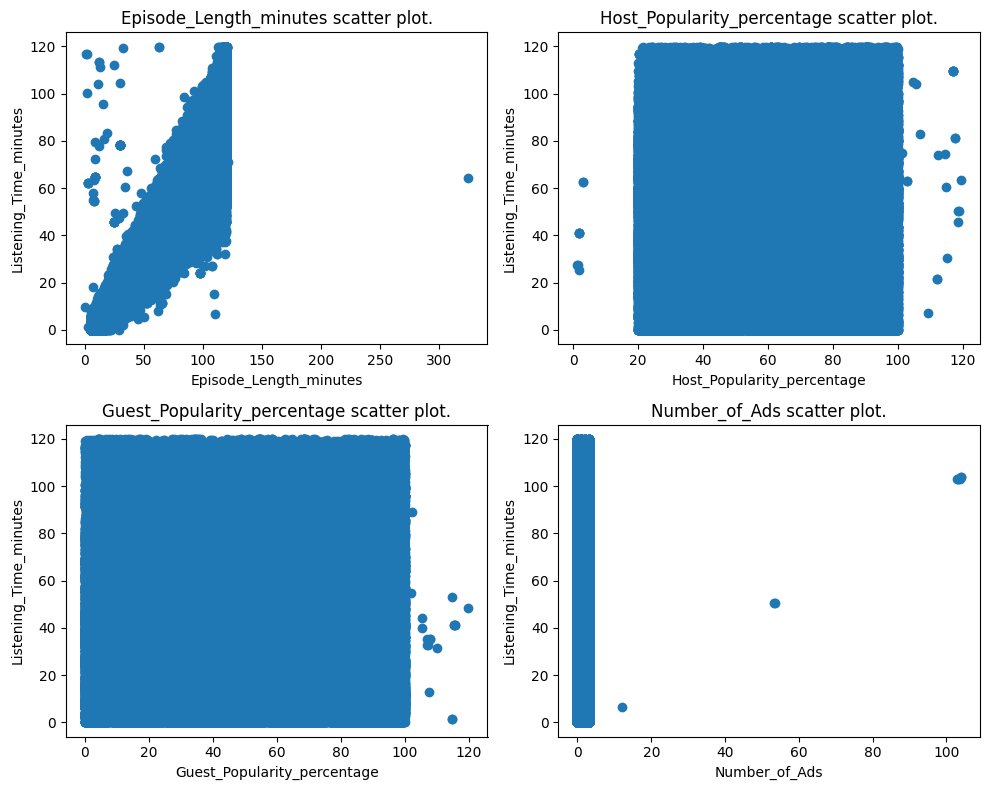

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i in range(4):
    
    ax[i//2, i%2].scatter(train[numeric_att[i]], train[target_att[0]])
    ax[i//2, i%2].set_title(f"{numeric_att[i]} scatter plot.")
    ax[i//2, i%2].set_xlabel(f"{numeric_att[i]}")
    ax[i//2, i%2].set_ylabel("Listening_Time_minutes")
    
fig.tight_layout()
plt.show()